
# 1. LOAD, EXPLORE, CLEAN, and MERGE DATASETS

In my first capstone project, I will work on predicting Airbnb new guest booking travel experience.The data was received from "Airbnb New User Bookings" competition on Kaggle website (https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings). 6 datasets are provided for this competitions. I will not include the sample submission and test user datasets in my analysis. Because the analysis results will be a multiclass classification, in terms of Machine Learning models, I will use a supervised model, Logistic Regression. In this notebook, I will first load all potential libraries that might be helpful for me during my analysis. Then, I will load, explore, and clean each dataset using different data wragnling strategies.   

__LOAD LIBRARIES__

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection


c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

print("Loaded")

Loaded


__1A__: __DATA WRANGLING ON SESSIONS DATASET__

I will first load and explore "Sessions" Dataset

In [3]:
dfsessions = pd.read_csv("FirstCapsProj/sessions.csv")

In [4]:
dfsessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350867 entries, 0 to 3350866
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 153.4+ MB


In [5]:
dfsessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


There are 6 variables in "Sessions" dataset. user_id is used for labelling. While "action", "action_type", "action_detail", "device_type" are categorical variables, secs_elapsed is continous variable. I will apply "shape" method on "dfsesssions" to see the number of columns (variables) and observations (rows).

In [6]:
dfsessions.shape

(3350867, 6)

In [7]:
dfsessions.columns

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed'], dtype='object')

Starting from here, I will explore the features of each categorical variable.

In [8]:
dfsessions.user_id.value_counts(dropna=False).head()

NaN           10381
wyv1imf8qw     2323
a0uhiojrra     2137
vcmr2jh5ix     2085
yu5bdalz2b     1811
Name: user_id, dtype: int64

In [9]:
dfsessions.action.value_counts(dropna=False).head()

show                     720939
search_results           306745
personalize              305294
index                    266518
ajax_refresh_subtotal    210145
Name: action, dtype: int64

In [10]:
dfsessions.action_type.value_counts(dropna=False).head(10)

view                894108
data                710436
click               696918
NaN                 434370
-unknown-           346514
submit              222171
message_post         36435
booking_request       6681
partner_callback      3233
booking_response         1
Name: action_type, dtype: int64

In [11]:
dfsessions.action_detail.value_counts(dropna=False).head(10)

view_search_results            583721
NaN                            434370
-unknown-                      346514
p3                             309532
wishlist_content_update        305294
change_trip_characteristics    210145
similar_listings               191940
user_profile                   136444
update_listing                  94968
user_social_connections         77627
Name: action_detail, dtype: int64



There are some NaN and unknown values in "action_detail." For consistency, I will replace "unknown"s with "NaN."

In [12]:
dfsessions=dfsessions.replace('-unknown-', np.nan)

In [13]:
dfsessions.action_detail.value_counts(dropna=False).head()

NaN                            780884
view_search_results            583721
p3                             309532
wishlist_content_update        305294
change_trip_characteristics    210145
Name: action_detail, dtype: int64

As seen above, all "unknown" values in the "Sessions" dataset are repaced with NaN. I will now use "describe" method to explore the only non-categorical variable in this dataset. 

In [14]:
dfsessions.describe()

,secs_elapsed
count,3.303438e+06
mean,2.112919e+04
std,9.353495e+04
min,0.000000e+00
25%,3.050000e+02
50%,1.222000e+03
75%,9.114000e+03
max,1.799949e+06


__1B__: __DATA WRANGLING ON COUNTRIES DATASET__ --- Now, I will load and explore the second dataset, which is countries. I will name it as "dfcountries."

In [15]:
dfcountries=pd.read_csv("FirstCapsProj/countries.csv")

In [16]:
dfcountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [17]:
dfcountries.head(20)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [18]:
dfcountries.shape

(10, 7)

There are only 10 observations and 7  in the "countries" dataset. "country_destination" and "destination_language" are categorical variables and other 5 variables are non-categorical variables.

In [19]:
dfcountries.set_index('country_destination')

,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
country_destination,,,,,,
AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45


I want to use descriptive statistics for the non-categorical variables in this dataset. 

In [20]:
dfcountries.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


__1C__: __DATA WRANGLING ON AGE_GENDER DATASET__ --- At this point, I will start loading and exploring another dataset, "age-gender." 

In [21]:
dfagegender=pd.read_csv("FirstCapsProj/age_gender_bkts.csv")

In [22]:
dfagegender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [23]:
dfagegender.shape

(420, 5)

"Age-Gender" dataset has 420 observations and 5 variables. Let's look at how many of them are categorical variables. 

In [24]:
dfagegender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


It looks like 3-4 for of them are categorical variables. I am going to figure out that. But first I am wondering how many age-bucket are there. When applied value_counts method, I found out that there are 21 age-bucket and 20 observations for each.

In [25]:
dfagegender['age_bucket'].value_counts(dropna=False, ascending=True)

35-39    20
65-69    20
70-74    20
0-4      20
45-49    20
55-59    20
95-99    20
20-24    20
100+     20
5-9      20
90-94    20
75-79    20
10-14    20
80-84    20
50-54    20
15-19    20
30-34    20
40-44    20
85-89    20
25-29    20
60-64    20
Name: age_bucket, dtype: int64

In [26]:
dfagegender.describe()

,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


Interestingly, I was expecting "year" as a categorical variable but it seems that it is not a categorical variable. However, there is only 2015 as the value. So, I don't think this will make any impact in my analyses.

In [27]:
dfagegender.country_destination.value_counts(dropna=False)

GB    42
IT    42
AU    42
PT    42
US    42
CA    42
NL    42
ES    42
FR    42
DE    42
Name: country_destination, dtype: int64

There are 10 country destinations!

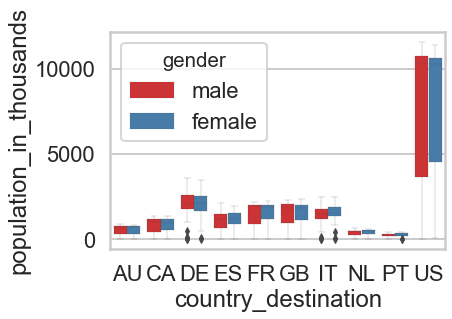

In [28]:
sns.boxplot(x="country_destination", y="population_in_thousands", data=dfagegender, hue='gender', linewidth=0.2,
           palette='Set1')

Just for curiousity, I wanted to create a box plot to look at male and female distributions based on country destinations. I will dig more into this in data storytelling notebook.

__1C__: __DATA WRANGLING ON TRAIN USERS DATASET__ --- And, finally, I am goint to load and explore "train_users" dataset.

In [29]:
dftrainusers=pd.read_csv("FirstCapsProj/train_users_2.csv")

In [30]:
dftrainusers.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


I see some "unknown" values here as well. Therefore, I am going to replace them with NaN values. 

In [31]:
dftrainusers=dftrainusers.replace('-unknown-', np.nan)

In [32]:
dftrainusers.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


As seen in the new table above, unknown_values are replaced with NaN.

In [33]:
dftrainusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              186185 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [34]:
dftrainusers.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'],
      dtype='object')

In [35]:
dftrainusers.id.value_counts(dropna=False).head()

zlcv8mpzyq    1
ngzwl479e1    1
4m390hrq9k    1
rrdmn09gbw    1
p0yhc0wvws    1
Name: id, dtype: int64

In [36]:
dftrainusers.shape

(213451, 16)

There are 213451 observations for 16 variables in the "Train Users" dataset.

__1E__: __MERGING DATASETS__ --- Looking at the datasets, I will first merge trainusers and countries dataframes on "country_destination" using "left" method.

In [37]:
dfmerge= pd.merge(dftrainusers, dfcountries, on='country_destination', how='left')

In [38]:
dfmerge.shape

(213451, 22)

As seen above, the number of observations are same with the "dftrainusers" dataframe. However, the number of variables increased from 16 to 22. In fact, there were 7 variables in "dfcountries" but increased the number of columns by 6 because I merged them on a common variable (country_destination). It seems that my merging worked fine here. Now, I am going to do a few exploration on this merged dataframe.

In [39]:
dfmerge.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0


In [40]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 22 columns):
id                               213451 non-null object
date_account_created             213451 non-null object
timestamp_first_active           213451 non-null int64
date_first_booking               88908 non-null object
gender                           117763 non-null object
age                              125461 non-null float64
signup_method                    213451 non-null object
signup_flow                      213451 non-null int64
language                         213451 non-null object
affiliate_channel                213451 non-null object
affiliate_provider               213451 non-null object
first_affiliate_tracked          207386 non-null object
signup_app                       213451 non-null object
first_device_type                213451 non-null object
first_browser                    186185 non-null object
country_destination              213451 non-null ob

In [41]:
dfmerge.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination', 'lat_destination', 'lng_destination', 'distance_km', 'destination_km2',
       'destination_language ', 'language_levenshtein_distance'],
      dtype='object')

Now, I noticed that there is an "id" variable here. I remember that in the "dfsessions" table, there was an "user_id" variable. I am wondering if they have the same id labels. I am going to test it. 

In [42]:
set1 = dfmerge.id.drop_duplicates().unique()

In [43]:
set2 = dfsessions.user_id.drop_duplicates().unique()

In [44]:
len(set1)

213451

In [45]:
len(set2)

47251

In [46]:
x= (set(set1).intersection(set(set2)) == set(set1))

In [47]:
print(x)

False


Above, it says "False" but it was "True" before I applied data wrangling! Now, I am going to apply "rename" method on dfmerge to rename "id" with "user_id".

In [48]:
dfmerge = dfmerge.rename(columns={'id' : 'user_id'})

In [49]:
dfmerge.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0


Great! Now, I can merge "dfmerge" and "dfsesssions" dataframes on "user_id" using inner method. 

In [50]:
dfmerge2= pd.merge(dfmerge, dfsessions, how='inner', on='user_id', left_on=None, right_on=None, left_index=False, right_index=False, sort=False, copy=True, indicator=False)

In [51]:
dfmerge2.shape

(3340486, 27)

The new dataset has 3340486 obervations and 27 columns (variables). 

In [52]:
dfmerge2.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,435.0


Finally, I can go ahead and merge "dfmerge2" dataframe with "dfagegender" using  "outer" method on 'country_destination' and 'gender'. 

In [53]:
dfmergefinal = pd.merge(dfmerge2, dfagegender, how='left', on=['country_destination', 'gender'], left_on=None, right_on=None, left_index=False, right_index=False, sort=False, copy=True, indicator=False)

In [54]:
dfmergefinal.shape

(3340486, 30)

In [55]:
dfmergefinal.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,action,action_type,action_detail,device_type,secs_elapsed,age_bucket,population_in_thousands,year
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,319.0,NaN,NaN,NaN
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,67753.0,NaN,NaN,NaN
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,301.0,NaN,NaN,NaN
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,22141.0,NaN,NaN,NaN
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,435.0,NaN,NaN,NaN


I think the number increased because of the year. However, there might be many NaN values for year. I am going to check it now and if it is true, I will change my method to "left" and merge two dataframes again.

AND yes, there are only 420, 2015 values for year. Because they will not impact my analysis, I changed merging method to left above.

In [56]:
dfmergefinal.year.value_counts(dropna=False)

NaN    3340486
Name: year, dtype: int64

In [57]:
dfmergefinal.set_index('user_id').head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,action,action_type,action_detail,device_type,secs_elapsed,age_bucket,population_in_thousands,year
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,319.0,NaN,NaN,NaN
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,67753.0,NaN,NaN,NaN
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,301.0,NaN,NaN,NaN
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,22141.0,NaN,NaN,NaN
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,435.0,NaN,NaN,NaN


__1F__: __EXPLORE FINAL DATASET__

In [58]:
dfmergefinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340486 entries, 0 to 3340485
Data columns (total 30 columns):
user_id                          object
date_account_created             object
timestamp_first_active           int64
date_first_booking               object
gender                           object
age                              float64
signup_method                    object
signup_flow                      int64
language                         object
affiliate_channel                object
affiliate_provider               object
first_affiliate_tracked          object
signup_app                       object
first_device_type                object
first_browser                    object
country_destination              object
lat_destination                  float64
lng_destination                  float64
distance_km                      float64
destination_km2                  float64
destination_language             object
language_levenshtein_distance    float64
act

In [59]:
dfmergefinal.country_destination.value_counts(dropna=False)

NDF      1833467
US       1013036
other     205497
FR         90282
IT         59932
ES         41473
GB         39540
CA         19006
DE         14512
NL         12830
AU          7434
PT          3477
Name: country_destination, dtype: int64

In [60]:
dfmergefinal.year.value_counts(dropna=False)

NaN    3340486
Name: year, dtype: int64

In [61]:
dfmergefinal.describe()

,timestamp_first_active,age,signup_flow,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance,secs_elapsed,population_in_thousands,year
count,3.340486e+06,2.051133e+06,3.340486e+06,1.301522e+06,1.301522e+06,1.301522e+06,1.301522e+06,1.301522e+06,3.293236e+06,0.0,0.0
mean,2.014031e+13,4.707961e+01,4.190008e+00,3.878673e+01,-7.455643e+01,1.696455e+03,7.925261e+06,1.512988e+01,2.113653e+04,NaN,NaN
std,1.294457e+08,1.462601e+02,8.630514e+00,7.123551e+00,4.288890e+01,3.292969e+03,3.767313e+06,3.347682e+01,9.356850e+04,NaN,NaN
min,2.014010e+13,1.500000e+01,0.000000e+00,-2.685339e+01,-9.681815e+01,0.000000e+00,4.154300e+04,0.000000e+00,0.000000e+00,NaN,NaN
25%,2.014021e+13,2.700000e+01,0.000000e+00,3.696643e+01,-9.584403e+01,0.000000e+00,9.826675e+06,0.000000e+00,3.040000e+02,NaN,NaN
50%,2.014032e+13,3.200000e+01,0.000000e+00,3.696643e+01,-9.584403e+01,0.000000e+00,9.826675e+06,0.000000e+00,1.222000e+03,NaN,NaN
75%,2.014042e+13,4.100000e+01,0.000000e+00,3.696643e+01,-9.584403e+01,0.000000e+00,9.826675e+06,0.000000e+00,9.112000e+03,NaN,NaN
max,2.014051e+13,2.014000e+03,2.500000e+01,6.239330e+01,1.332752e+02,1.529774e+04,9.984670e+06,9.545000e+01,1.799949e+06,NaN,NaN


In [62]:
dfmergefinal.columns

Index(['user_id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination', 'lat_destination', 'lng_destination', 'distance_km', 'destination_km2',
       'destination_language ', 'language_levenshtein_distance', 'action', 'action_type', 'action_detail', 'device_type', 'secs_elapsed', 'age_bucket', 'population_in_thousands', 'year'],
      dtype='object')

In [63]:
dfmergefinal['gender'].value_counts(dropna=False)

NaN       1577464
FEMALE     983557
MALE       775840
OTHER        3625
Name: gender, dtype: int64

In [64]:
dfmergefinal["date_account_created"].value_counts(dropna=False).head()

2014-04-23    51606
2014-05-08    45675
2014-05-01    45340
2014-04-22    40898
2014-05-06    40715
Name: date_account_created, dtype: int64

In [65]:
dfmergefinal['signup_method'].value_counts(dropna=False)

basic       2560503
facebook     758025
google        21958
Name: signup_method, dtype: int64

In [66]:
dfmergefinal['language'].value_counts(dropna=False).head(10)

en    3220418
zh      32886
ko      18134
fr      16562
es      14353
de       7690
it       6848
ru       6351
pt       5903
ja       4069
Name: language, dtype: int64

In [67]:
dfmergefinal['affiliate_channel'].value_counts(dropna=False)

direct           2040957
sem-brand         561621
sem-non-brand     300409
seo               162039
api               137208
content            60256
other              41715
remarketing        36281
Name: affiliate_channel, dtype: int64

In [68]:
dfmergefinal['affiliate_provider'].value_counts(dropna=False).head()

direct      2040957
google      1054052
other        167958
facebook      28514
bing          24800
Name: affiliate_provider, dtype: int64

In [69]:
dfmergefinal['first_affiliate_tracked'].value_counts(dropna=False)

untracked        1826984
omg               840053
linked            588867
tracked-other      48118
product            24692
marketing           9063
local ops           1408
NaN                 1301
Name: first_affiliate_tracked, dtype: int64

In [70]:
dfmergefinal['signup_app'].value_counts(dropna=False)

Web        2658107
iOS         337293
Android     257227
Moweb        87859
Name: signup_app, dtype: int64

In [71]:
dfmergefinal['first_device_type'].value_counts(dropna=False)

Mac Desktop           1393196
Windows Desktop       1014599
iPhone                 360698
Other/Unknown          252422
iPad                   236127
Android Phone           37971
Android Tablet          24539
Desktop (Other)         20247
SmartPhone (Other)        687
Name: first_device_type, dtype: int64

In [72]:
dfmergefinal['first_browser'].value_counts(dropna=False).head(8)

Chrome             1023269
Safari              745934
NaN                 581051
Firefox             423528
Mobile Safari       280566
IE                  244100
Chrome Mobile        20531
Android Browser       8388
Name: first_browser, dtype: int64

In [73]:
dfmergefinal['country_destination'].value_counts(dropna=False)

NDF      1833467
US       1013036
other     205497
FR         90282
IT         59932
ES         41473
GB         39540
CA         19006
DE         14512
NL         12830
AU          7434
PT          3477
Name: country_destination, dtype: int64

In [74]:
dfmergefinal['action'].value_counts(dropna=False).head(10)

show                     718641
search_results           305832
personalize              304252
index                    265751
ajax_refresh_subtotal    209524
similar_listings         191308
lookup                   125724
update                   124317
search                   109414
social_connections        79580
Name: action, dtype: int64

In [75]:
dfmergefinal['action_type'].value_counts(dropna=False)

view                891481
NaN                 778417
data                708144
click               695092
submit              221079
message_post         36365
booking_request       6679
partner_callback      3228
booking_response         1
Name: action_type, dtype: int64

In [76]:
dfmergefinal['action_detail'].value_counts(dropna=False).head(10)

NaN                            778417
view_search_results            582208
p3                             308472
wishlist_content_update        304252
change_trip_characteristics    209524
similar_listings               191308
user_profile                   136091
update_listing                  94293
user_social_connections         77393
header_userpic                  53745
Name: action_detail, dtype: int64

In [77]:
dfmergefinal['device_type'].value_counts(dropna=False).head(10)

Mac Desktop                         1380371
Windows Desktop                      996292
iPhone                               347747
Android App Unknown Phone/Tablet     261669
iPad Tablet                          227619
NaN                                   52313
Android Phone                         30889
Tablet                                21546
Linux Desktop                         10748
Chromebook                             8710
Name: device_type, dtype: int64

In [78]:
dfmergefinal['age_bucket'].value_counts(dropna=False)

NaN    3340486
Name: age_bucket, dtype: int64

In [79]:
dfmergefinal.set_index('user_id').head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,action,action_type,action_detail,device_type,secs_elapsed,age_bucket,population_in_thousands,year
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,319.0,NaN,NaN,NaN
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,67753.0,NaN,NaN,NaN
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,301.0,NaN,NaN,NaN
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,22141.0,NaN,NaN,NaN
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,435.0,NaN,NaN,NaN


In [80]:
dfmergefinal.isnull().sum(axis=0)

user_id                                0
date_account_created                   0
timestamp_first_active                 0
date_first_booking               1833467
gender                           1577464
age                              1289353
signup_method                          0
signup_flow                            0
language                               0
affiliate_channel                      0
affiliate_provider                     0
first_affiliate_tracked             1301
signup_app                             0
first_device_type                      0
first_browser                     581051
country_destination                    0
lat_destination                  2038964
lng_destination                  2038964
distance_km                      2038964
destination_km2                  2038964
destination_language             2038964
language_levenshtein_distance    2038964
action                             33876
action_type                       778417
action_detail   

As seen above, some of the variables have all NaN values, some have most of them as NaN, some other have a few of the variables listed NaN, while some others have no NaN values. For my first intention, I think I will not be using age_bucket, population_in_thousands, year, destination_km2, destination_language, distance_km, lat_destination, lng_destination, and language_levenshtein_distance for my analysis. Therefore, I don't ave any problem with them having all or most of the observations as NaN. 

In [81]:
dfmergefinal['age'].value_counts(dropna=False)

NaN       1289353
27.0       111913
30.0       102873
28.0       102512
29.0        98400
26.0        98077
31.0        92877
25.0        92733
32.0        89541
33.0        83604
34.0        76240
24.0        73068
35.0        72124
23.0        65081
36.0        58834
22.0        51620
37.0        48560
38.0        47375
39.0        36940
40.0        33703
41.0        31746
42.0        31400
21.0        30933
43.0        29791
45.0        28589
44.0        28327
105.0       27146
46.0        25482
47.0        25277
51.0        21479
           ...   
85.0          221
106.0         216
86.0          198
1942.0        196
1995.0        195
107.0         181
2008.0        152
96.0          142
99.0          127
90.0          123
93.0          121
83.0          115
81.0          105
91.0          101
89.0           81
115.0          75
1936.0         74
103.0          73
82.0           58
2013.0         50
15.0           42
94.0           32
87.0           32
1953.0         15
132.0     

In [82]:
print(sum(dfmergefinal.age > 100))
print(sum(dfmergefinal.age < 18))

44005
1455


In [83]:
dfmergefinal[dfmergefinal.age > 100]['age'].describe()

count    44005.000000
mean       590.759686
std        830.016341
min        101.000000
25%        105.000000
50%        105.000000
75%       1942.000000
max       2014.000000
Name: age, dtype: float64

As seen above, there are some inconsistencies in age values. The max value is 2014 above 100. I think someone might enter the year rather than age. Also, there are 1289353 NaN values, 44005 values above 100, and 1455 values lower than 18. Even though,the longest life span of human beings is around 122, I do not want to involve the people over 100 years old but I will check if I want to include them. Therefore, I am going to check the number less and more than 122 next. https://en.wikipedia.org/wiki/Oldest_people

In [84]:
dfmergefinal[dfmergefinal.age >= 122]['age'].describe()

count    11599.000000
mean      1946.777308
std        341.616915
min        132.000000
25%       2014.000000
50%       2014.000000
75%       2014.000000
max       2014.000000
Name: age, dtype: float64

The minimum value larger than 122 seems to be 132. I am going to repeat the process one more time to see both how many 132 exist and the values larger than 132. 

In [85]:
dfmergefinal[dfmergefinal.age >132]['age'].describe()


count    11591.000000
mean      1948.029851
std        338.390041
min        150.000000
25%       2014.000000
50%       2014.000000
75%       2014.000000
max       2014.000000
Name: age, dtype: float64

In [86]:
dfmergefinal[dfmergefinal.age==132]['age'].value_counts()

132.0    8
Name: age, dtype: int64

There are 8 observations of 132 years old. Also, the minimum age more than 132 is 150. So, I am going to check if there is any customers more than 150 years old.

In [87]:
dfmergefinal[dfmergefinal.age >150]['age'].describe()

count    11195.000000
mean      2011.631443
std         12.056480
min       1924.000000
25%       2014.000000
50%       2014.000000
75%       2014.000000
max       2014.000000
Name: age, dtype: float64

In [88]:
dfmergefinal[dfmergefinal.age==150]['age'].value_counts()

150.0    396
Name: age, dtype: int64

It seems that the largest values that I can include in my analysis is 150. I don't want to miss this value because there are 396 observation on the age 150. Now, I am going to explore the values less than 18 and see if I might want to include any values less than 18. 

In [89]:
dfmergefinal[dfmergefinal.age <18]['age'].describe()

count    1455.000000
mean       16.698969
std         0.518004
min        15.000000
25%        16.000000
50%        17.000000
75%        17.000000
max        17.000000
Name: age, dtype: float64

The minimum value is 15. I am going to check how many 15s are there. 

In [90]:
dfmergefinal[dfmergefinal.age == 15]['age'].value_counts()

15.0    42
Name: age, dtype: int64

42 observations. I am going to include those observations in my analysis as well. 

Now, I want to replace the values more than 150 years old with NaN because there might be some values in other variables that might be useful for my analysis. 

In [91]:
dfmergefinal['age'] = np.where((dfmergefinal.age>150), np.nan, dfmergefinal.age)

In [92]:
dfmergefinal['age'].value_counts(dropna=False)

NaN      1300548
27.0      111913
30.0      102873
28.0      102512
29.0       98400
26.0       98077
31.0       92877
25.0       92733
32.0       89541
33.0       83604
34.0       76240
24.0       73068
35.0       72124
23.0       65081
36.0       58834
22.0       51620
37.0       48560
38.0       47375
39.0       36940
40.0       33703
41.0       31746
42.0       31400
21.0       30933
43.0       29791
45.0       28589
44.0       28327
105.0      27146
46.0       25482
47.0       25277
51.0       21479
          ...   
79.0         493
100.0        490
101.0        486
150.0        396
108.0        373
16.0         354
95.0         352
84.0         349
102.0        328
78.0         223
85.0         221
106.0        216
86.0         198
107.0        181
96.0         142
99.0         127
90.0         123
93.0         121
83.0         115
81.0         105
91.0         101
89.0          81
115.0         75
103.0         73
82.0          58
15.0          42
94.0          32
87.0          

In [93]:
dfmergefinal.shape

(3340486, 30)